In [1]:
import numpy as np

In [4]:
observations = np.loadtxt('ovariancancer_obs.csv', delimiter=',')
print(observations,observations.shape,"observations")

[[ 0.063915   0.033242   0.018484  ...  0.038839   0.038151   0.032085 ]
 [ 0.025409   0.051085   0.056305  ...  0.020427   0.023261   0.019975 ]
 [ 0.025536   0.036123   0.054195  ... -0.0094466  0.021481   0.025569 ]
 ...
 [ 0.023558   0.021331   0.01621   ...  0.0082736  0.004742   0.024756 ]
 [ 0.028351   0.023266   0.0045561 ...  0.010033   0.017391   0.031537 ]
 [ 0.027428   0.027021   0.015273  ...  0.026642   0.027718   0.040418 ]] (216, 4000) observations


In [14]:
f = open('ovariancancer_grp.csv',"r")
f


<_io.TextIOWrapper name='ovariancancer_grp.csv' mode='r' encoding='UTF-8'>

In [15]:
group = f.read().split("\n")
group

['Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',

In [18]:
U,S,VT = np.linalg.svd(observations,full_matrices=False)
S = np.diag(S)
print(U,U.shape,"U")
print(S,S.shape,"S")


[[-0.0577678  -0.04858544  0.03224939 ... -0.00448284  0.02854983
  -0.03294778]
 [-0.05616021 -0.05015381 -0.00648035 ...  0.0237815   0.00049225
   0.00606339]
 [-0.0447222  -0.09643244  0.00299052 ...  0.00042229  0.00827564
  -0.00978713]
 ...
 [-0.06791642 -0.02433165  0.13271557 ...  0.06350802  0.02983646
  -0.00426709]
 [-0.07168472 -0.01309551  0.15645677 ... -0.16209063  0.02788101
   0.18604786]
 [-0.06614115 -0.00708132 -0.04926619 ...  0.02450533 -0.08484526
  -0.04331567]] (216, 216) U
[[8.29279895e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.03024891e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.93768639e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.34966337e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.95003845e-01 0.00000000e

In [19]:
print(VT,VT.shape,"VT")


[[-0.00060164 -0.0005753  -0.00052043 ... -0.00048118 -0.00046371
  -0.00046603]
 [-0.00102053 -0.00082593 -0.00100337 ... -0.00164536 -0.00163812
  -0.00141799]
 [-0.00051662 -0.00091245 -0.00049831 ... -0.0006867  -0.000277
  -0.00026139]
 ...
 [ 0.00312521  0.00946269  0.00544211 ...  0.0219999   0.01305783
  -0.00138808]
 [ 0.01704698  0.01374886  0.0118848  ... -0.00584029 -0.01819346
  -0.02161528]
 [-0.01654069 -0.00974341 -0.00026356 ... -0.00794087  0.00280175
   0.00369631]] (216, 4000) VT


In [20]:
patient_count = observations.shape[0]
patient_count

216

In [22]:
observations[0,:].shape

(4000,)

In [27]:
VT[0,:] @ observations[0,:]

-47.90567546653094

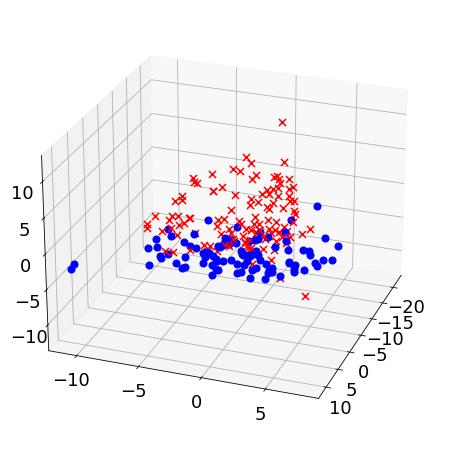

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for i in range(patient_count):
    x = VT[1,:] @ observations[i,:]
    y = VT[2,:] @ observations[i,:]
    z = VT[3,:] @ observations[i,:]
    
    if group[i] == 'Cancer':
        ax.scatter(x,y,z, marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z, marker='o',color='b',s=50)
        
ax.view_init(25,20)
plt.show()